# Abstract

This project aims to develop and implement a robust fraud detection system using a diverse dataset of credit card transactions. Leveraging state-of-the-art machine learning algorithms, the model will learn patterns and anomalies inherent in legitimate and fraudulent transactions.The successful implementation of this fraud detection system holds the potential to significantly mitigate financial losses, safeguard the integrity of credit card transactions, and enhance overall customer trust in electronic payment systems

# **Credit Card Fraud Detection**
**Anonymized credit card transactions labeled as fraudulent or genuine**

**What is Credit Card Fraud?** 
Credit card fraud is the unauthorized use of a debit or credit card to make purchases or withdraw cash. In 2021, there were 389,845 reports of credit card fraud in the US with the Federal Trade Commission reporting it to be the most common type of identity fraud affecting people aged 20-39.

# # **Traditional Approach**

**Rule Based Approach:** As the name suggests, those systems rely on hard coded rules that are set to flag transactions if they meet certain criteria.  
Such rules can be developed by: following industry best practices - like blocking multiple transactions from a single account in a short period of time or the ones coming through VPNs or from risky areas,analyzing caught / prevented fraudulent transactions and developing new rules to cover all of their suspicious characteristics.
The rules are often expressed using “if-else” statements present in almost all imperative programming languages and are easily interpretable.   

**Disadvantages**  
Continuous need of reverse engineering fraudsters’ attacks - new rules have to be developed as new fraud patterns emerge.
Incremental number of rules - cost of maintenance grows in time (recalibration & adjusting to new fraud patterns).
Detection of fraud cases with limited complexity - there is a limit for number of rules & transactions’ features. Rule based systems are limited by human comprehension (due to manual development of rules & necessary maintenance).


# ML Approach

**Automatic fraud pattern recognition** - the task of figuring out what makes a fraud is handled by the algorithm. Our task is to provide it with as detailed a description as possible.  
**Concept drift** defined as a change in fraud characteristics in time (new fraud methods, new tools used by fraudsters) often can be solved by retraining the models on new data — there’s no need to reverse engineer fraudsters’ methods.  
**Less manual work involved** - many of the processes can be automated. Companies that have mature machine learning pipelines spend most of the time on researching new features & algorithms while keeping an eye on performance metrics of current models available through monitoring apps.  
**ML models’ economical efficiency** grows along with data volume. The more data you have and the more complex it is, the harder it is to develop rule-based systems. The return on developing automated fraud detection using ML models thus increases as data volume increases.


# Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Eventually, it is also important for companies NOT to detect transactions which are genuine as fraudulent, otherwise, companies would keep blocking the credit card, and which may lead to customer dissatisfaction. So here are two important expects of this analysis:

* What would happen when the company will not able to detect the fraudulent transaction and would not confirm from a customer about this recent transaction whether it was made by him/her.

* In contract, what would happen when the company will detect a genuine transaction as fraudulent and keep calling customer for confirmation or might block the card.


In [99]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:

df = pd.read_csv('creditcard.csv', encoding='latin_1')

The encoding='latin-1' parameter in the pd.read_csv function is specifying the character encoding of the CSV file being read. In this case, 'latin-1' (also known as ISO-8859-1) is a widely used encoding scheme that supports a large range of characters, including those used in English and many Western European languages.


In [101]:
# Converting all column names to lower case
df.columns = df.columns.str.lower()


In [102]:
df.head()


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [103]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0



* **Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however, we may guess that these features might be originally credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.** 

* The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


# Exploratory Data Analysis

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.

Now that we have the data, I wanted to run a few initial comparisons between the three columns - Time, Amount, and Class.

# Checking concise summary of dataset


It is also a good practice to know the features and their corresponding data types, along with finding whether they contain null values or not 

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

**Highlights**

* Dataset contains details of 284807 transactions with 31 features.
* There is no missing data in our dataset, every column contain exactly 284807 rows.
* All data types are float64, except 1: Class 
* All data types are float64, except 1: Class 
* 28 columns have Sequential Names and values that don't make any logical sense - > V1, V2 ....V28
* 3 columns: TIME, AMOUNT and CLASS which can be analysed for various INSIGHTS! 
* Memory Usage: 67.4 MB, not so Harsh !!

class
0    284315
1       492
Name: count, dtype: int64


class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


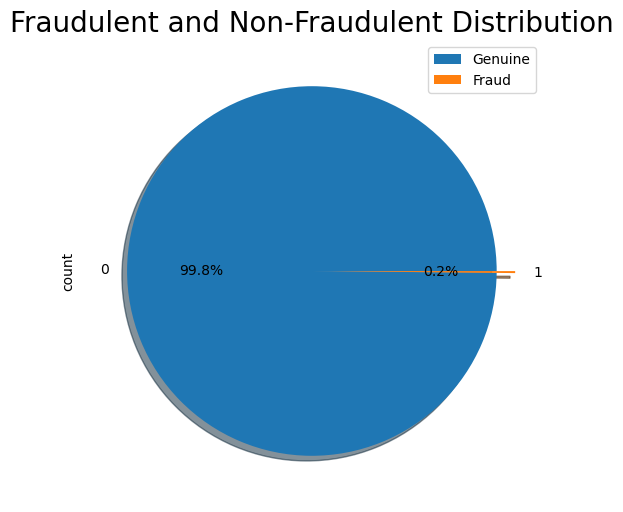

In [105]:
## Count unique values of label

print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine", "Fraud"])
plt.show()

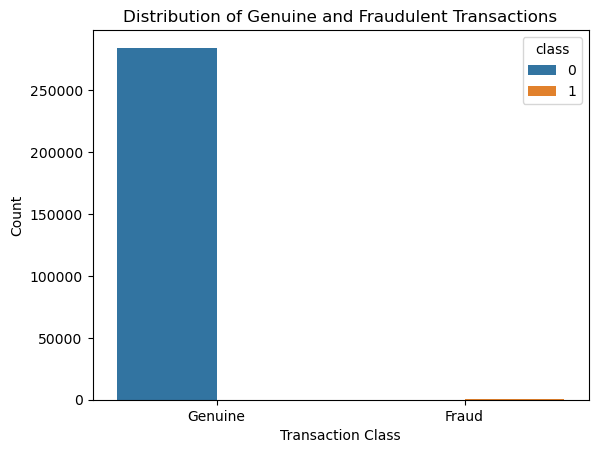

In [106]:
sns.countplot(x='class', data=df, hue='class')

# Add labels for 0 and 1
plt.xticks([0, 1], ['Genuine', 'Fraud'])

plt.title('Distribution of Genuine and Fraudulent Transactions')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

**Highlights**

This dataset has 492 frauds out of 284,315 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!


## Generate descriptive statistics

The describe() function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

Let's summarize the central tendency, dispersion and shape of a dataset's distribution. Out of all the columns, the only ones that made the most sense were Time, Amount, and Class (fraud or not fraud). The other 28 columns were transformed using what seems to be a PCA dimensionality reduction in order to protect user identities.

The data itself is short in terms of time (it’s only 2 days long), and these transactions were made by European cardholders.


In [108]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


**Highlights**
* On an average, credit card transaction is happening at every 94813.86 seconds.
* Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly ** positively skewed**. We will check the distribution graph of the amount to get more clarity.


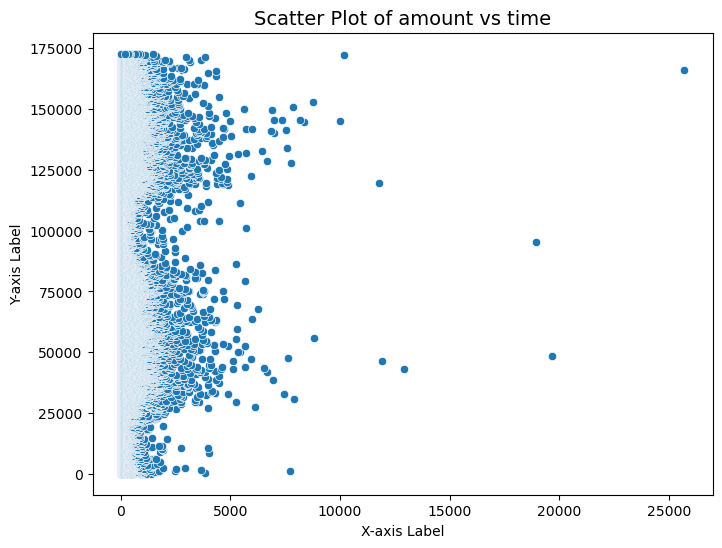

In [111]:
plt.figure(figsize=(8, 6))
plt.title('Scatter Plot of amount vs time', fontsize=14)

# Scatter plot using Seaborn
sns.scatterplot(x=df['amount'], y=df['time'], data=df)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.show()

**Highlights**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions are occurring as well.

In [113]:
### Distribution of Amount for Fradulent & Genuine transactions

print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())


Fraud Transaction distribution : 
 amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


**Highlights**

* There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higest fraud transaction amount was 2125.87 and lowest was just 0.00.
* There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer. Instead, an amount of zero is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not. After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments

Ref : https://docs.multisafepay.com/docs/zero-authorization

In [115]:
print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())


Genuine Transaction distribution : 
 amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: count, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


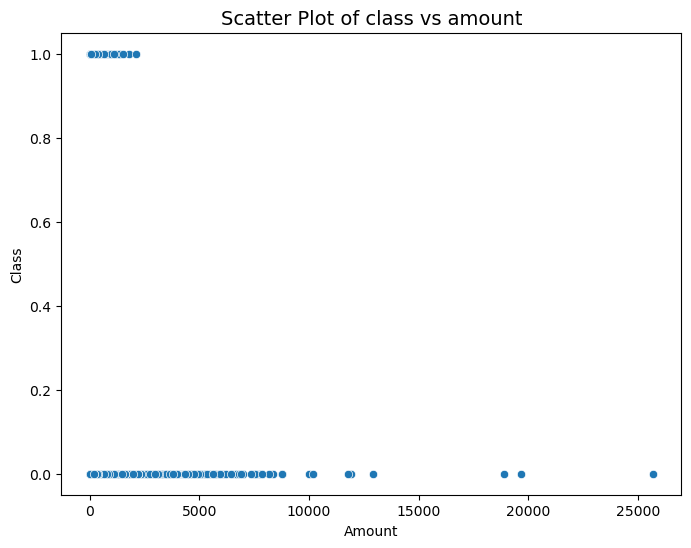

In [116]:
### Distribution of Amount w.r.t Class

plt.figure(figsize=(8, 6))
plt.title('Scatter Plot of class vs amount', fontsize=14)

# Scatter plot using Seaborn
sns.scatterplot(x=df['amount'], y=df['class'], data=df)

plt.xlabel('Amount')
plt.ylabel('Class')

plt.show()


**Highlights**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also, we should be conscious about that these **outliers should not be the fraudulent transaction**. Generally, fraudulent transactions of the very big amount and removing them from the data can make the predicting model bais. 

So we can essentially build a model that realistically predicts transaction as fraud without affected by outliers. It may not be really useful to actually have our model train on these extreme outliers.


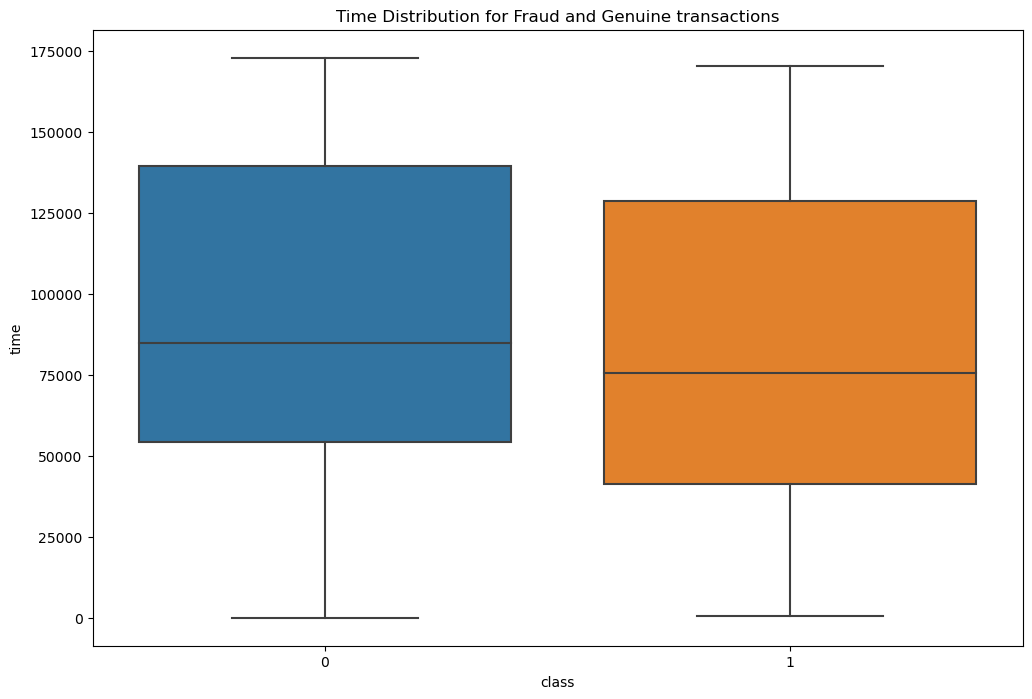

In [117]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='class', y='time',data = df)

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()


In [119]:


# Finding unique values for each column to understand which column is categorical and which one is Continuous

# Finging unique values for each column
df[['time','amount','class']].nunique()


time      124592
amount     32767
class          2
dtype: int64

In [120]:
### Converting time from second to hour

# Converting time from second to hour
df['time'] = df['time'].apply(lambda sec : (sec/3600))

In [121]:
### Calculating hour of the day

import math
# Calculating hour of the day
df['hour'] = df['time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))


In [122]:
### Calculating First and Second Day

# Calculating First and Second day
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))


In [123]:
df[['time','hour','day','amount','class']]


,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [124]:
### Fraud and Genuine transaction Day wise

# calculating fraud transaction daywise
dayFrdTran = df[(df['class'] == 1)]['day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['class'] == 0)]['day'].value_counts()

# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)


No of transaction Day wise:
day
1    144787
2    140020
Name: count, dtype: int64


No of fraud transaction Day wise:
day
1    281
2    211
Name: count, dtype: int64


No of genuine transactions Day wise:
day
1    144506
2    139809
Name: count, dtype: int64


Percentage of fraud transactions Day wise:
day
1    0.194078
2    0.150693
Name: count, dtype: float64


**Highlights**

* Total number of transaction on Day 1 was 144787, out of which 281 was a fraud and 144506 was genuine. Fraud transaction was 0.19% of the total transaction on day 1.

* Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2.

* Most of the transaction including the fraud transaction happened on day 1.



In [127]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
df = df.drop(['Time'], axis=1)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
df.shape

(284807, 30)

In [15]:
df.duplicated().any()

True

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(275663, 30)

In [18]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [19]:
import seaborn as sns

<Axes: ylabel='count'>

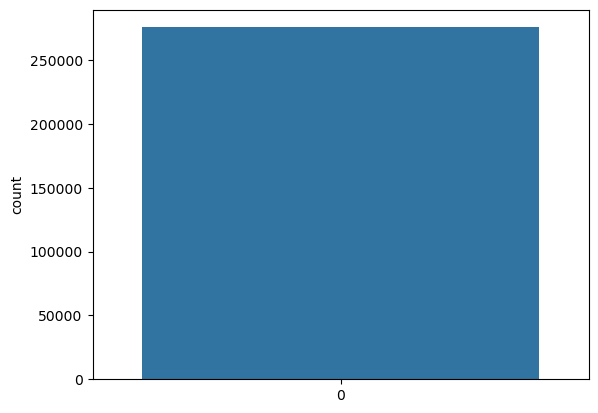

In [20]:
v = sns.countplot(df['Class'])
v

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Undersampling

In [23]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [24]:
normal.shape

(275190, 30)

In [25]:
fraud.shape

(473, 30)

In [26]:
normal_sample = normal.sample(n=473)

In [27]:
normal_sample.shape

(473, 30)

In [28]:
df1 = pd.concat([normal_sample, fraud],ignore_index=True)

In [29]:
df1['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-3.556916,3.373323,0.102364,-0.637880,-0.665992,-1.338522,0.898241,-0.200660,2.483858,4.109857,...,-0.820333,-0.824135,0.042778,0.608789,0.371790,-0.028166,0.525197,-0.281671,-0.306652,0
1,1.662907,-0.331004,-2.532570,1.488428,0.576170,-1.521255,1.339856,-0.634735,-0.176065,0.312322,...,0.433119,0.915071,-0.402151,0.024386,0.753507,-0.212786,-0.098411,-0.042577,0.546340,0
2,1.131678,-0.148501,1.149198,1.156443,-0.830485,0.297663,-0.722131,0.303604,0.772327,-0.009904,...,-0.041211,0.013723,-0.049116,-0.013078,0.402886,-0.403474,0.063021,0.023218,-0.313289,0
3,1.499181,-0.747621,-2.357950,0.690095,0.041733,-1.529636,0.880903,-0.539610,0.257959,-0.488118,...,0.169229,-0.058482,-0.210928,-0.052928,-0.020539,0.665150,-0.146568,0.004591,0.890175,0
4,1.184348,-0.413140,0.778122,-0.973872,-0.751916,0.172132,-0.719827,0.239573,1.490031,-0.972164,...,0.052263,0.429619,-0.066356,-0.267868,0.461293,-0.655978,0.109789,0.019659,-0.349231,0


In [31]:
X = df1.drop('Class', axis=1)
y = df1['Class']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_predict1 = log.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_predict1)

0.9421052631578948

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
precision_score(y_test, y_predict1)

0.9789473684210527

In [39]:
recall_score(y_test, y_predict1)

0.9117647058823529

In [40]:
f1_score(y_test, y_predict1)

0.9441624365482234

# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_predict2 = dt.predict(X_test)

In [43]:
accuracy_score(y_test,y_predict2)

0.9210526315789473

In [44]:
precision_score(y_test, y_predict2)

0.9393939393939394

In [45]:
recall_score(y_test,y_predict2)

0.9117647058823529

In [46]:
f1_score(y_test, y_predict2)

0.9253731343283583

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_predict3 = rf.predict(X_test)

In [49]:
accuracy_score(y_test, y_predict3)

0.9315789473684211

In [50]:
precision_score(y_test, y_predict3)

0.968421052631579

In [51]:
recall_score(y_test, y_predict3)

0.9019607843137255

In [52]:
f1_score(y_test, y_predict3)

0.934010152284264

In [53]:
final_df = pd.DataFrame({'Models':['LR', 'DT', 'RF'],
             "ACC": [accuracy_score(y_test, y_predict1)*100,
                    accuracy_score(y_test, y_predict2)*100,
                    accuracy_score(y_test, y_predict3)*100
                    ]})

In [54]:
final_df

,Models,ACC
0,LR,94.210526
1,DT,92.105263
2,RF,93.157895


# Oversampling

In [55]:
X = df.drop('Class', axis=1)
y = df['Class']

In [56]:
X.shape

(275663, 29)

In [57]:
y.shape

(275663,)

In [58]:
# # Run during first time then comment this and run again
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [59]:
from imblearn.over_sampling import SMOTE


In [60]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [61]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

# Logistic Regression

In [63]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_predict4 = log.predict(X_test)

In [65]:
accuracy_score(y_test, y_predict4)

0.9457102365638286

In [66]:
precision_score(y_test, y_predict4)

0.9732975498619505

In [67]:
recall_score(y_test, y_predict4)

0.9164954638837881

In [68]:
f1_score(y_test, y_predict4)

0.9440428480467432

# Decision Tree Classifier

In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_predict5 = dt.predict(X_test)

In [71]:
accuracy_score(y_test, y_predict5)

0.9982739198372034

In [72]:
precision_score(y_test, y_predict5)

0.9974407841001905

In [73]:
recall_score(y_test, y_predict5)

0.9991091395014817

In [74]:
f1_score(y_test, y_predict5)

0.9982742647459535

# Random Forest Classifier

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_predict6 = rf.predict(X_test)

In [77]:
accuracy_score(y_test, y_predict6)

0.9999364075729495

In [78]:
precision_score(y_test, y_predict5)

0.9974407841001905

In [79]:
recall_score(y_test, y_predict5)

0.9991091395014817

In [80]:
f1_score(y_test, y_predict5)

0.9982742647459535

In [81]:
final_df = pd.DataFrame({'Models':['LR', 'DT', 'RF'],
             "ACC": [accuracy_score(y_test, y_predict4)*100,
                    accuracy_score(y_test, y_predict5)*100,
                    accuracy_score(y_test, y_predict6)*100
                    ]})

In [82]:
final_df

,Models,ACC
0,LR,94.571024
1,DT,99.827392
2,RF,99.993641


<Axes: xlabel='Models', ylabel='ACC'>

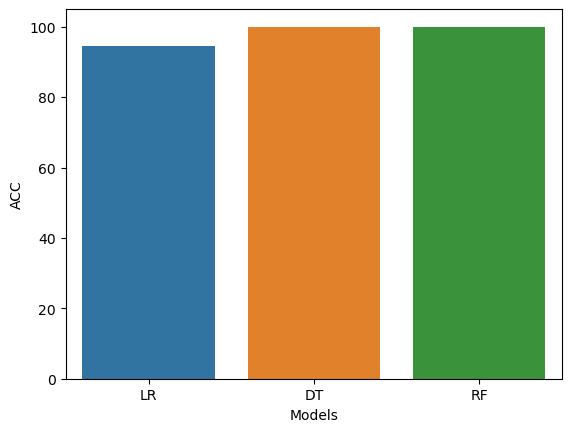

In [84]:
import seaborn as sns

# Assuming final_df is your DataFrame
sns.barplot(x='Models', y='ACC', data=final_df)


# Final Model using Random Forest Classifier

In [91]:
rf1 =RandomForestClassifier()
rf1.fit(X_res, y_res)

RandomForestClassifier()

In [92]:
import joblib

In [93]:
joblib.dump(rf1, 'model.joblib')

['model.joblib']

In [94]:
model = joblib.load('model.joblib')

In [95]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\aagam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [96]:
if pred ==0:
    print("Genunine Transaction")
else:
    print("Fradulent Transaction")

Genunine Transaction
